In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
publicart = gpd.read_file('../data/publicart.geojson')
print(publicart.crs)
publicart.head( )

EPSG:4326


,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,TN,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,TN,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,TN,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,TN,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489)


In [3]:
type(publicart)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


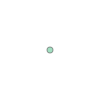

In [4]:
publicart.loc[0, 'geometry']

In [5]:
print(publicart.geometry.type.value_counts())

Point    162
Name: count, dtype: int64


In [6]:
print(publicart.crs) 

EPSG:4326


#### ...and printing it


In [7]:
print(publicart.loc[0, 'geometry'])

POINT (-86.7749099997113 36.1623999997369)


#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


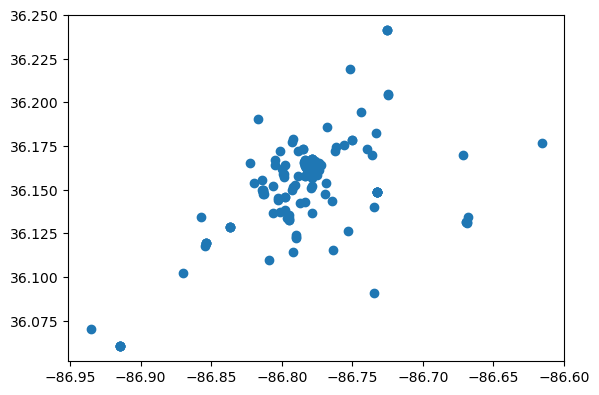

In [8]:
publicart.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


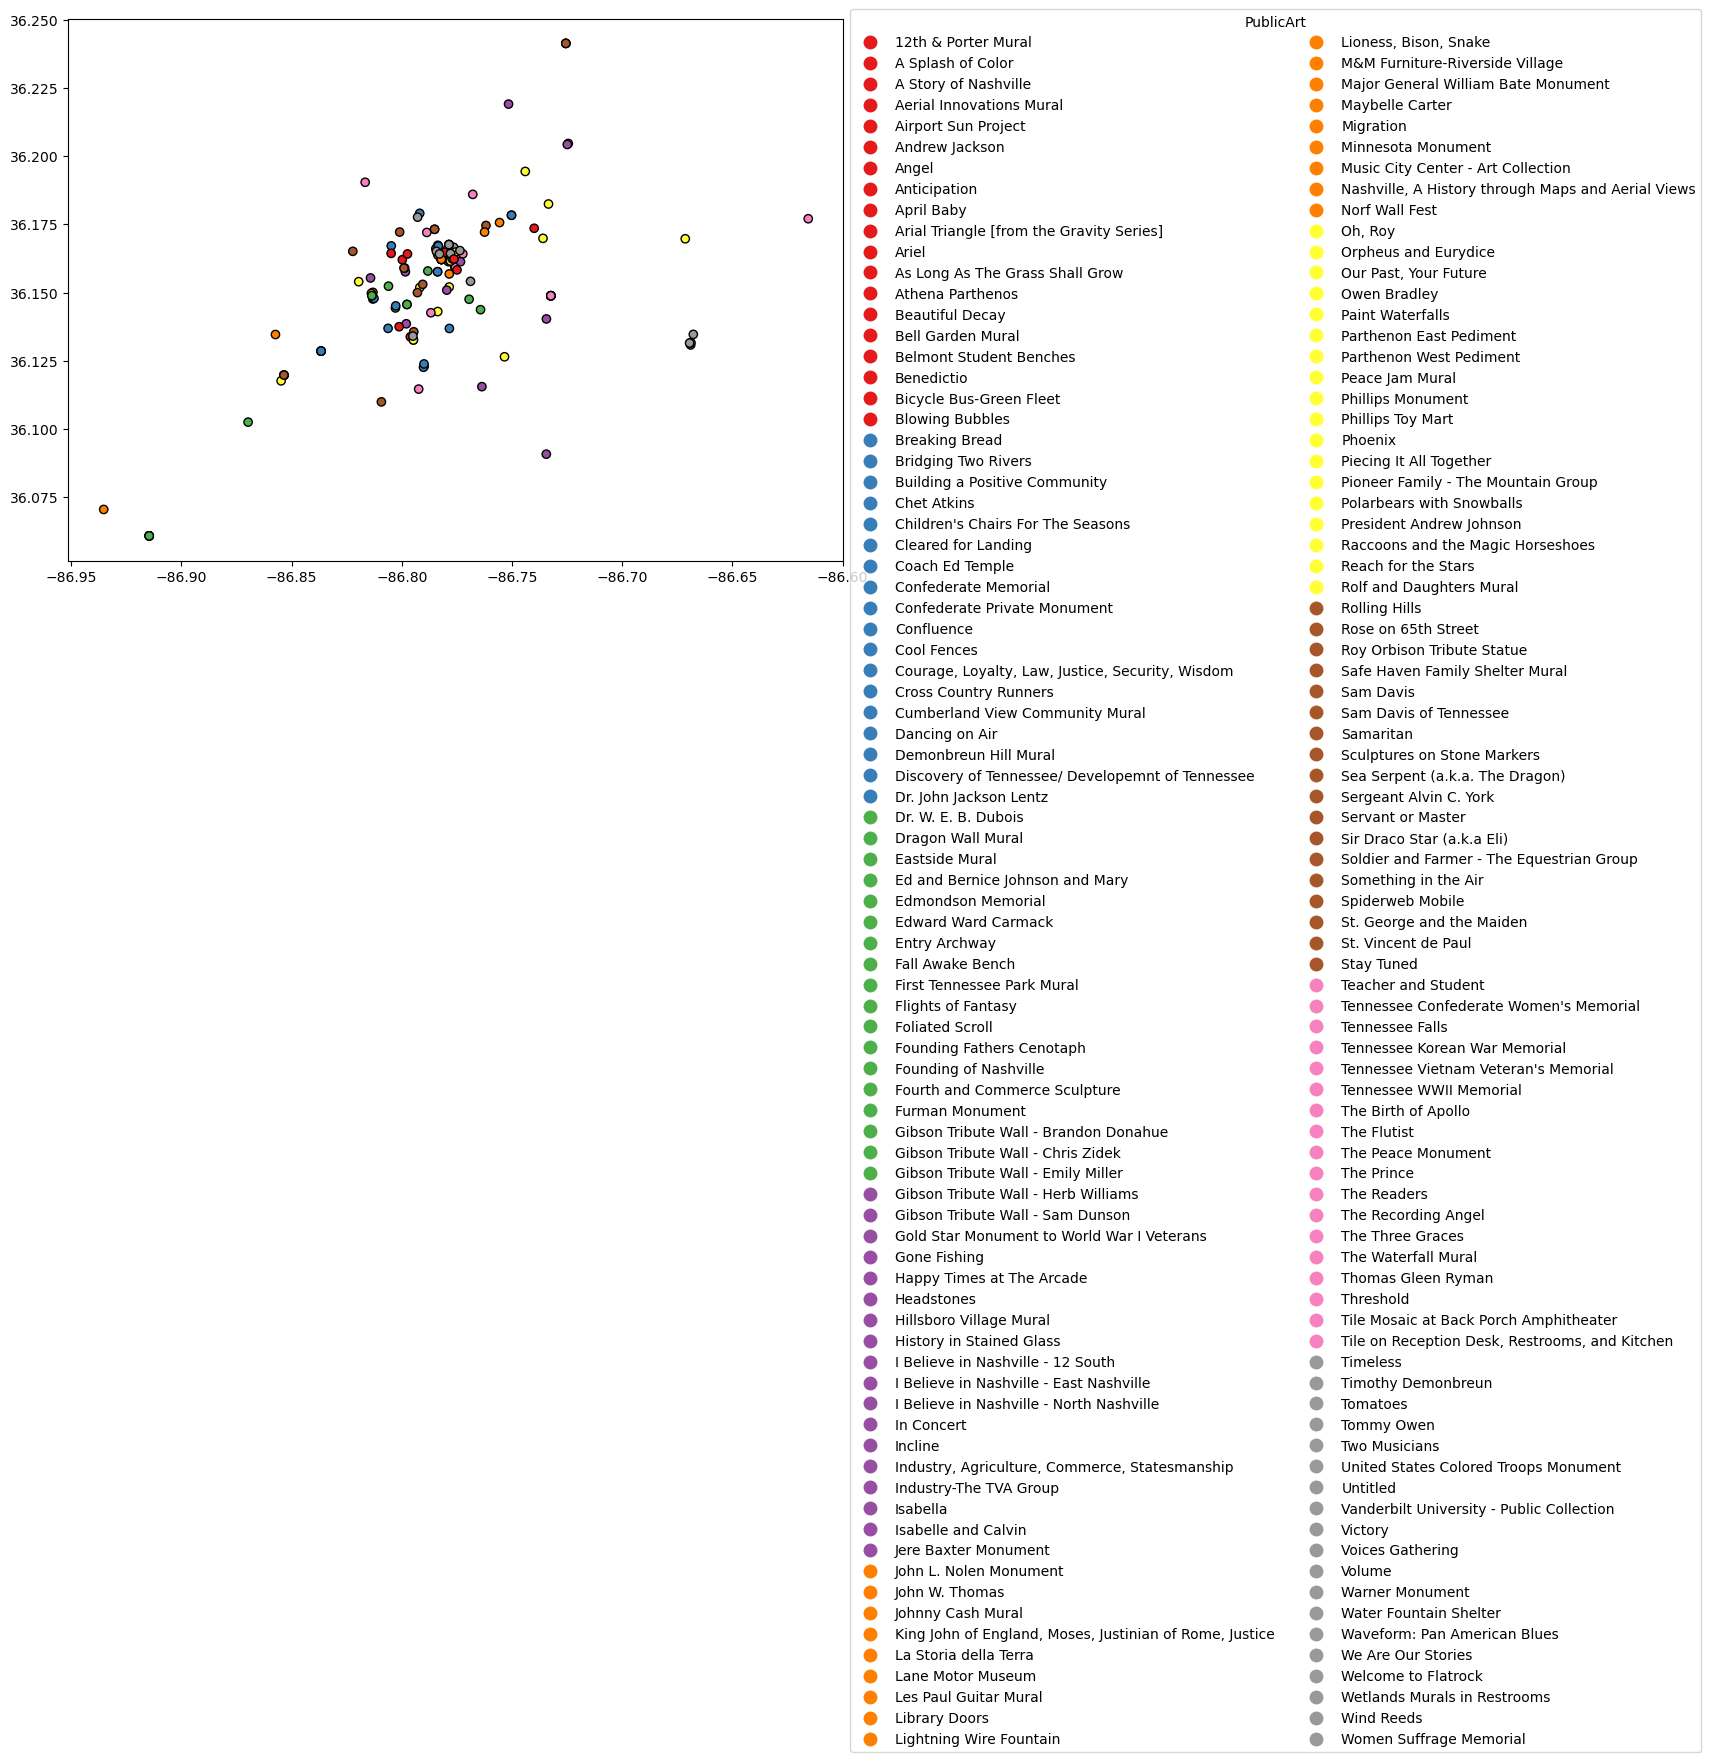

In [9]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'PublicArt', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

publicart.plot(column = 'Title', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set1')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [10]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [11]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop      2524 non-null   object 
 1   route     2524 non-null   object 
 2   location  2524 non-null   object 
 3   lat       2524 non-null   float64
 4   lng       2524 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.7+ KB


- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [12]:
publicart.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [13]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = publicart.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [14]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

In [15]:
bus_geo.head()

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.78090 36.14264)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.67200 36.10562)
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.79561 36.13762)
4,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242,POINT (-86.80424 36.17594)


In [16]:
publicart.head()

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,TN,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,TN,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,TN,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,TN,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489)


In [17]:
print("Bus stops geometry type:", bus_geo.geometry.type.unique())
print("Public art geometry type:", publicart.geometry.type.unique())

Bus stops geometry type: ['Point']
Public art geometry type: ['Point' None]


In [18]:
publicart = publicart[publicart.geometry.notna() & (publicart.geometry.type == 'Point')]

In [19]:
print(publicart[publicart['Latitude'].isna() | publicart['Longitude'].isna()])

                  Title ArtistLastName    ArtistFirstName          Address  \
52  Cleared for Landing          Sorci                Joe   Hermitage Park   
96  Bridging Two Rivers  Bard and Duff  J. Dante and Troy  Two Rivers Park   

                                            Medium InstallationType  \
52  Salvaged airplane parts, aluminum and concrete        Sculpture   
96                                Painted concrete            Mural   

                                          Description  Latitude  Longitude  \
52  This sculpture is made from salvaged airplane ...       NaN        NaN   
96  The brightly-colored murals depict neighborhoo...       NaN        NaN   

         City State ZipCode                              GlobalID  OBJECTID  \
52  Nashville    TN   37203  ac2df760-a52f-47e9-a897-50c75407e0a9        53   
96  Nashville    TN   37212  f458374f-62e7-425f-9f50-c49928e2b211        97   

                      geometry  
52  POINT (-86.77840 36.13685)  
96  POINT (-

In [20]:
publicart_clean = publicart.dropna(subset=['Latitude', 'Longitude'])

In [21]:
publicart_clean.head()

,Title,ArtistLastName,ArtistFirstName,Address,Medium,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,geometry
0,Les Paul Guitar Mural,Hughes,Milree,100 Broadway,Painting,Mural,None,36.16240,-86.77491,Nashville,TN,37201,35e62647-30e1-48e6-8ff8-4a295f9fd7cd,1,POINT (-86.77491 36.16240)
1,Sam Davis,LeQuire,Alan,4001 Harding Road,Bronze,Sculpture,None,36.12856,-86.83660,Nashville,TN,37205,3da320dd-d95f-4fdd-a11f-520d849c83fa,2,POINT (-86.83660 36.12856)
2,The Flutist,Varo,Marton,1 Symphony Place,Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,Nashville,TN,37201,878eaed2-ef42-48fb-a12c-4f480c6cbe6f,3,POINT (-86.77594 36.15961)
3,Blowing Bubbles,Faxon,Russell,4715 Harding Pike,Bronze,Sculpture,None,36.11975,-86.85343,Nashville,TN,37205,494eb47f-3f49-4e35-bfef-2b02a7db3e88,4,POINT (-86.85343 36.11975)
4,Anticipation,Faxon,Russell,505 Deaderick Street,Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,Nashville,TN,37219,11ee93fb-ebc5-433c-b2e3-4d442ca0e6e1,5,POINT (-86.78184 36.16489)


#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame
      


In [22]:
stops_near_art = gpd.sjoin(bus_geo, publicart_clean, predicate = 'within')

In [23]:
stops_near_art = gpd.sjoin_nearest(
    bus_geo,
    publicart,
    max_distance=0.002, 
    distance_col="distance_to_art"
)

C:\Users\seanf\anaconda3\envs\geospatial\lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [24]:
stops_near_art.head()


,stop,route,location,lat,lng,geometry,index_right,Title,ArtistLastName,ArtistFirstName,...,InstallationType,Description,Latitude,Longitude,City,State,ZipCode,GlobalID,OBJECTID,distance_to_art
5,WEDGEWOOD AVE & 18TH AVE S WB,UNIVERSITY CONNECTOR,"(36.137212, -86.796865)",36.137212,-86.796865,POINT (-86.79686 36.13721),33,Hillsboro Village Mural,Rudloff,Andee,...,Mural,None,36.138570,-86.797950,Nashville,TN,37212,26dd6ddd-5035-4ca9-8d2e-d63c5a59bbb4,34,0.001738
6,MAIN ST & N 7TH ST EB,GALLATIN PIKE,"(36.174379, -86.761018)",36.174379,-86.761018,POINT (-86.76102 36.17438),51,Stay Tuned,Saporiti,Adrien,...,Mural,Use #staytunednashville and share your photo!,36.174564,-86.761809,Nashville,TN,37206,e836e339-651b-46a2-a2b6-22c734d8ebb9,52,0.000812
20,BROADWAY AVE & 9TH AVE S WB,WEST END - WHITE BRIDGE,"(36.158366, -86.783544)",36.158366,-86.783544,POINT (-86.78354 36.15837),53,Volume,Saporiti,Adrien,...,Mural,Giant stacks of stereo hi-fi speakers.,36.136849,-86.778404,Nashville,TN,37203,70732232-e95b-47b4-9d56-ff819aa90161,54,0.000768
20,BROADWAY AVE & 9TH AVE S WB,WEST END - WHITE BRIDGE,"(36.158366, -86.783544)",36.158366,-86.783544,POINT (-86.78354 36.15837),108,Confederate Memorial,Nicoli,Carlo,...,Sculpture,"In 1869, the Ladies’ Memorial Society of Nashv...",36.148830,-86.732390,Nashville,TN,37203,1d565bf0-cb51-40e9-8ba5-1dff6a60c0e2,109,0.000768
27,CONVENTION CENTER STATION INBOUND,NOLENSVILLE PK BRT LITE,"(36.160899, -86.77444)",36.160899,-86.774440,POINT (-86.77444 36.16090),140,I Believe in Nashville - North Nashville,Saporiti,Adrien,...,Mural,The I Believe in Nashville mural was created a...,36.164133,-86.797418,Nashville,TN,37201,5885c826-bed7-4448-bbf5-920823e9c725,141,0.001156


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [25]:
stops_near_art['stop'].value_counts()

stop
6TH AVE N & COMMERCE ST SB         7
7TH AVE N & CHURCH ST SB           7
7TH AVE & COMMERCE ST SB           7
2ND AVE N & CHURCH ST NB           5
4TH AVE N & CHURCH ST SB           5
                                  ..
MUSIC CITY CENTRAL 4TH - BAY 14    1
WOODLAND ST & MCFERRIN AVE WB      1
GALLATIN PIKE & STROUSE AVE SB     1
CLEVELAND ST & N 3RD ST EB         1
22ND AVE N & PATTERSON ST NB       1
Name: count, Length: 246, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [26]:
stops_in_37207 = stops_near_art.loc[stops_near_art['ZipCode'] == '37207']
stops_in_37207.shape

(5, 22)

In [27]:
polygon37207 = publicart.loc[publicart['ZipCode'] == '37207']
polygon37207.shape

(2, 15)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

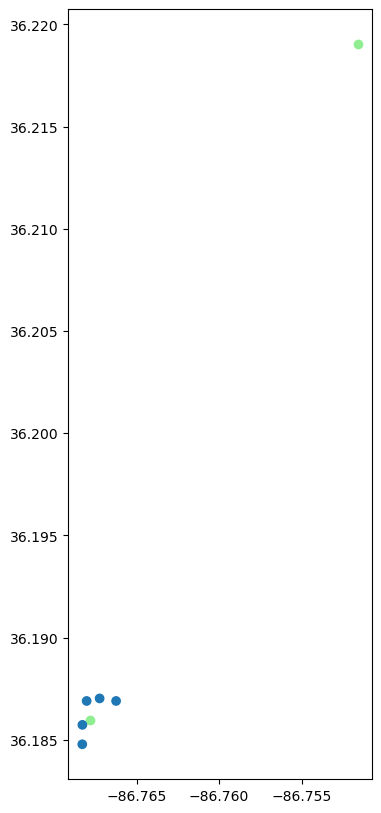

In [28]:
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'route');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [29]:
polygon37207.geometry.centroid

C:\Users\seanf\AppData\Local\Temp\ipykernel_28160\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


42     POINT (-86.75157 36.21903)
146    POINT (-86.76780 36.18596)
dtype: geometry

In [30]:
#find the center of the larger (more southern) polygon and look at it
center =polygon37207.geometry.centroid[42]
print(center)

POINT (-86.751569999847 36.2190299997521)


C:\Users\seanf\AppData\Local\Temp\ipykernel_28160\4024620667.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center =polygon37207.geometry.centroid[42]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [31]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.2190299997521, -86.751569999847]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [32]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [33]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 52
values are:
 
stop                                      MERIDIAN ST & WILBURN ST SB
route                                                        MERIDIAN
location                                      (36.185733, -86.768284)
lat                                                         36.185733
lng                                                        -86.768284
geometry                                 POINT (-86.768284 36.185733)
index_right                                                       146
Title                                                      The Prince
ArtistLastName                                                 Outlaw
ArtistFirstName                                              Adrienne
Address                                             615 Church Street
Medium              Mixed Media Use of heavy guage aluminum wire a...
InstallationType                                               Mobile
Description         Outlaw hung a whimsical mobile under a paint

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [34]:

map_37207 = folium.Map(location=area_center, zoom_start=14)
folium.GeoJson(polygon37207, style_function=lambda x: {'fillColor': 'lightblue'}).add_to(map_37207)


for _, row in stops_near_art.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"""
            <b>Bus Stop: {row['stop']}<br>
            <b>Routes:</b> {row['route']}<br>
    """,
        icon=folium.Icon(color="blue", icon="bus", prefix='fa')
    ).add_to(map_37207)


for _, row in publicart_clean.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['Title']}</b><br>Artist: {row['ArtistLastName']}",
        icon=folium.Icon(color="red", icon="paint-brush", prefix='fa')
    ).add_to(map_37207)


map_37207.save('../maps/map37207_with_art.html')
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [35]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: int = 0,
    max_zoom: int = 18,
    zoom_start: int = 10,
    min_lat: int = -90,
    max_lat: int = 90,
    min_lon: int = -180,
    max_lon: int = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: bool = True,
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tile

In [36]:
cluster_map_37207 = folium.Map(location=area_center, zoom_start=12)


bus_cluster = MarkerCluster(name="Bus Stops").add_to(cluster_map_37207)
art_cluster = MarkerCluster(name="Public Art").add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)


for _, row in stops_near_art.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Bus Stop: {row['stop']}",
        icon=folium.Icon(color="blue", icon="bus", prefix='fa')
    ).add_to(bus_cluster)


for _, row in publicart_clean.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Art: {row['Title']}",
        icon=folium.Icon(color="red", icon="paint-brush", prefix='fa')
    ).add_to(art_cluster)


folium.LayerControl().add_to(cluster_map_37207)
cluster_map_37207.save('../maps/cluster37207.html')
cluster_map_37207

In [37]:
map_37207 = folium.Map(location=area_center, zoom_start=14)


folium.GeoJson(
    polygon37207,
    style_function=lambda x: {'fillColor': 'lightblue', 'color': 'green', 'weight': 2}
).add_to(map_37207)


FastMarkerCluster(
    data=stops_near_art[['lat', 'lng']].values.tolist(),
    callback="""
    function(m) {
        return L.marker(m, {
            icon: L.AwesomeMarkers.icon({
                icon: 'bus',
                prefix: 'fa',
                markerColor: 'blue'
            })
        });
    }
    """
).add_to(map_37207)

map_37207